# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
import pandas as pd
import tensorflow
import numpy
import torch
import matplotlib.pyplot as plt
import seaborn as sns



# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [ ]:
DATA_PATH = "california_housing_data/california_housing.csv"
df = pd.read_csv(DATA_PATH)
if "MedHouseVal" not in df.columns:
    raise ValueError("Kolom 'MedHouseVal' tidak ditemukan di dataset!")

display(df.head())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (20640, 9)


In [4]:
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


In [5]:
print("\nMissing values in each column:")
print(df.isnull().sum())
print("Data duplikat")
print(df.duplicated().sum())


Missing values in each column:
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Data duplikat
0


In [6]:
print("\nDescriptive statistics:")
display(df.describe())


Descriptive statistics:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [7]:
print("\nDistribution of target variable (MedHouseVal):")
display(df['MedHouseVal'].value_counts())


Distribution of target variable (MedHouseVal):


,count
MedHouseVal,
5.00001,965
1.37500,122
1.62500,117
1.12500,103
1.87500,93
...,...
0.34200,1
0.46200,1
3.52000,1



Visualizing distributions of numerical features:


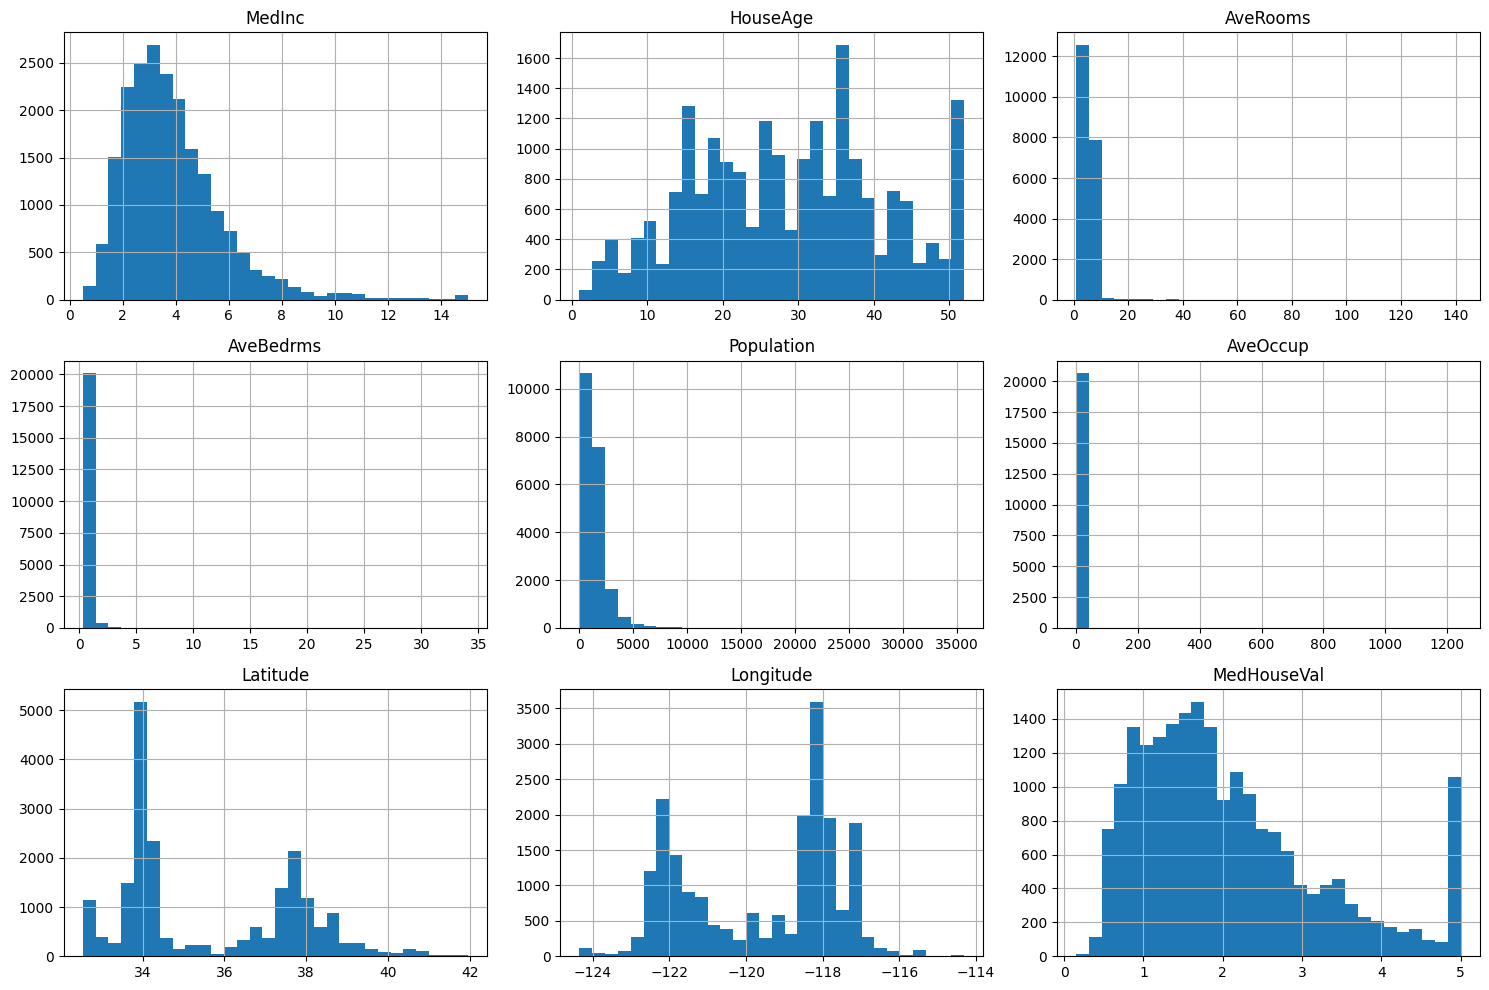

In [8]:
print("\nVisualizing distributions of numerical features:")
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()


Visualizing correlations between features:


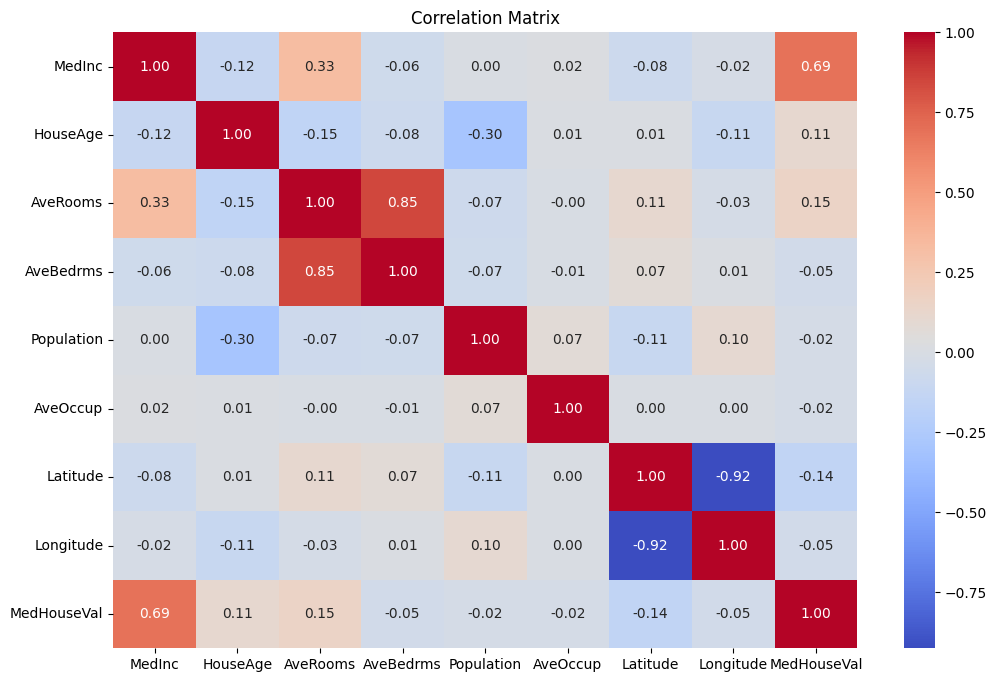

In [9]:
print("\nVisualizing correlations between features:")
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


Box plots to detect outliers:


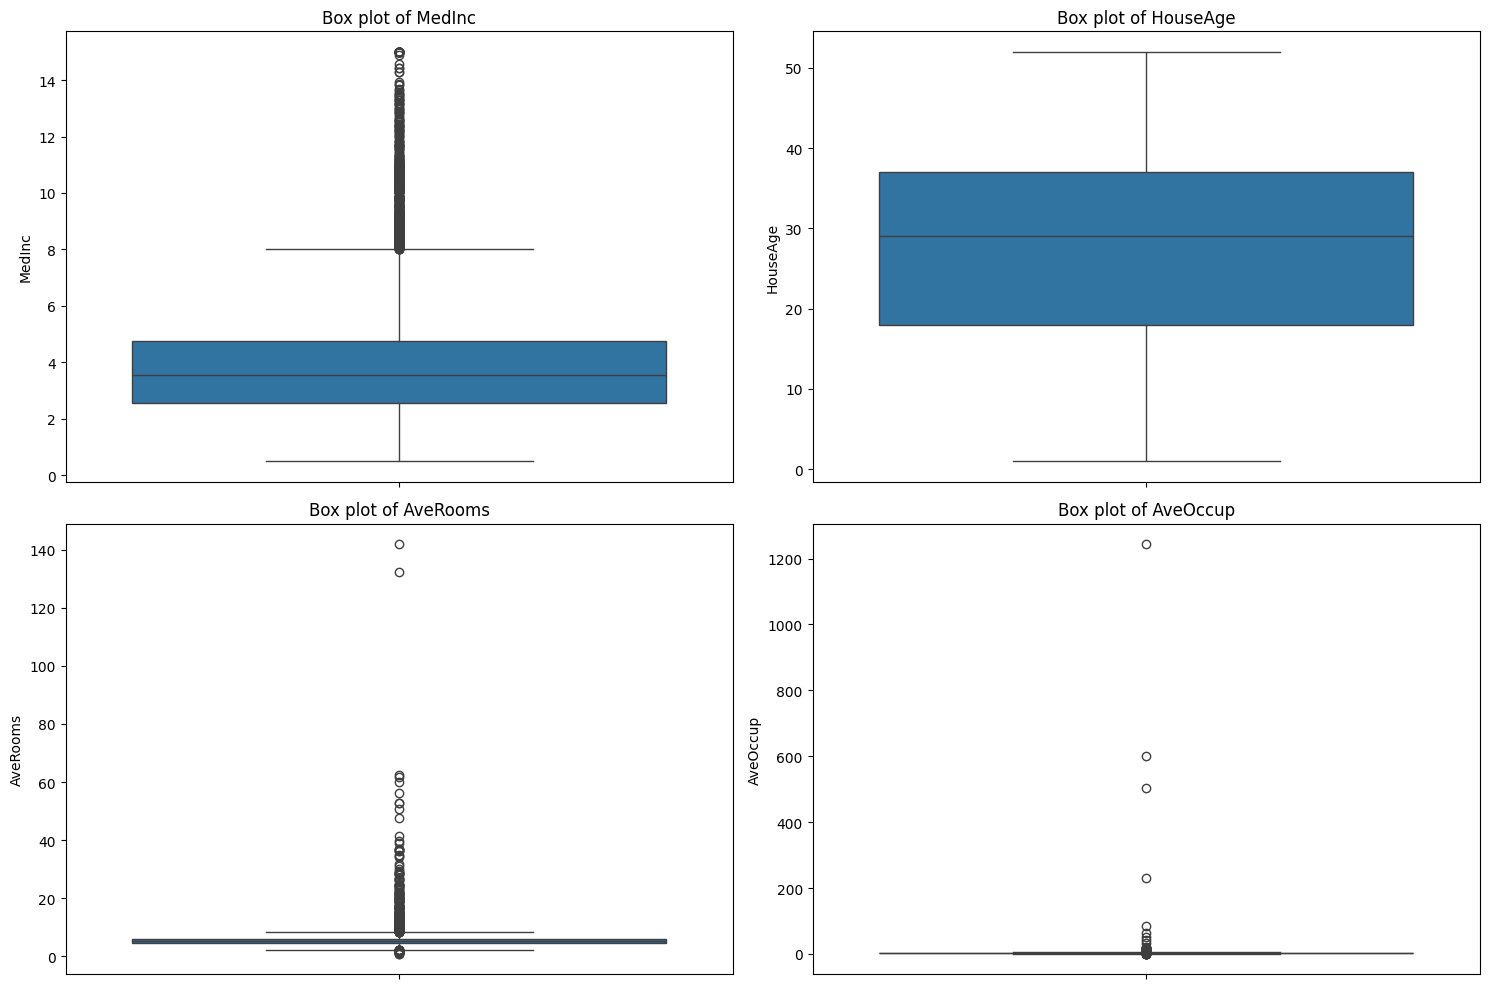

In [10]:
print("\nBox plots to detect outliers:")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(y=df['MedInc'])
plt.title('Box plot of MedInc')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['HouseAge'])
plt.title('Box plot of HouseAge')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['AveRooms'])
plt.title('Box plot of AveRooms')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['AveOccup'])
plt.title('Box plot of AveOccup')

plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Melakukan Standarisasi Pada fitur

In [14]:
from sklearn.preprocessing import MinMaxScaler

# Pilih fitur numerik yang akan distandarisasi
# Kita akan mengecualikan kolom target 'MedHouseVal'
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('MedHouseVal')

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan min-max scaling pada fitur numerik
df[numerical_features] = scaler.fit_transform(df[numerical_features])

print("DataFrame setelah min-max scaling fitur:")
display(df.head())

DataFrame setelah min-max scaling fitur:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422



Visualizing distributions of numerical features:


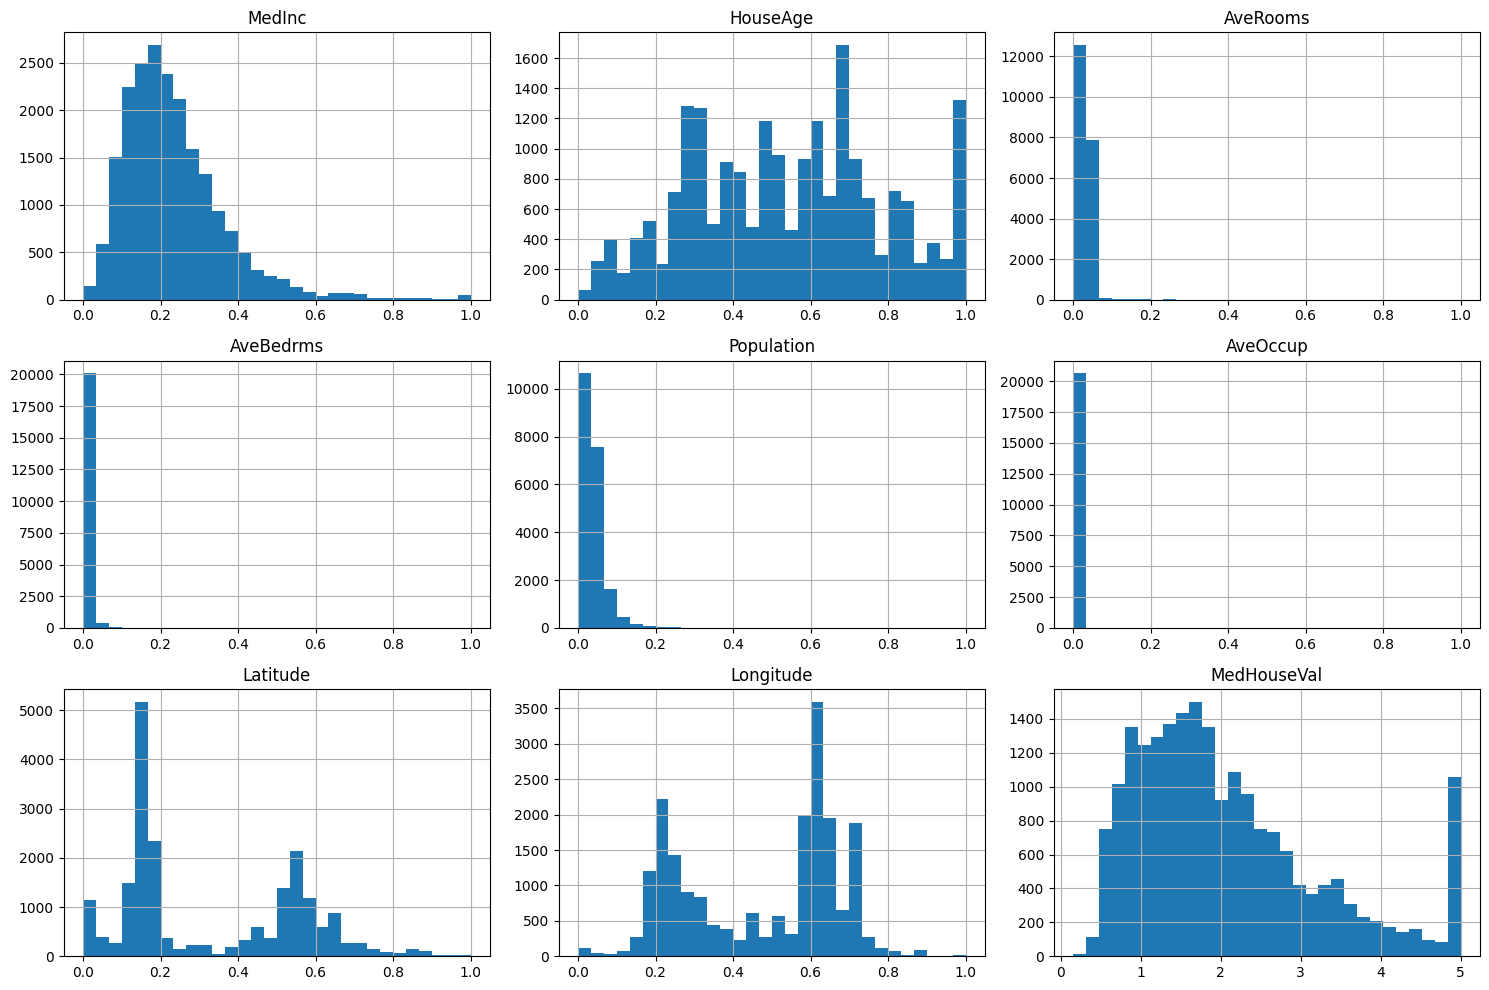

In [15]:
print("\nVisualizing distributions of numerical features:")
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

Menangani Outlayer

In [17]:
from scipy import stats
import numpy as np

# Identifikasi fitur numerik untuk penanganan outlier (kecuali kolom target)
numerical_features_for_outliers = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'MedHouseVal' in numerical_features_for_outliers:
    numerical_features_for_outliers.remove('MedHouseVal')

# Hitung Z-score untuk setiap nilai dalam fitur numerik
z_scores = np.abs(stats.zscore(df[numerical_features_for_outliers]))

# Tentukan threshold Z-score (umumnya 3)
threshold = 3

# Filter DataFrame untuk menghapus outlier berdasarkan Z-score
df_cleaned_zscore = df[(z_scores < threshold).all(axis=1)]

print("Shape of DataFrame before outlier handling (Z-score):", df.shape)
print("Shape of DataFrame after outlier handling (Z-score):", df_cleaned_zscore.shape)

# Tampilkan beberapa baris pertama dari DataFrame yang sudah dibersihkan
display(df_cleaned_zscore.head())

Shape of DataFrame before outlier handling (Z-score): (20640, 9)
Shape of DataFrame after outlier handling (Z-score): (19794, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422



Box plots to detect outliers:


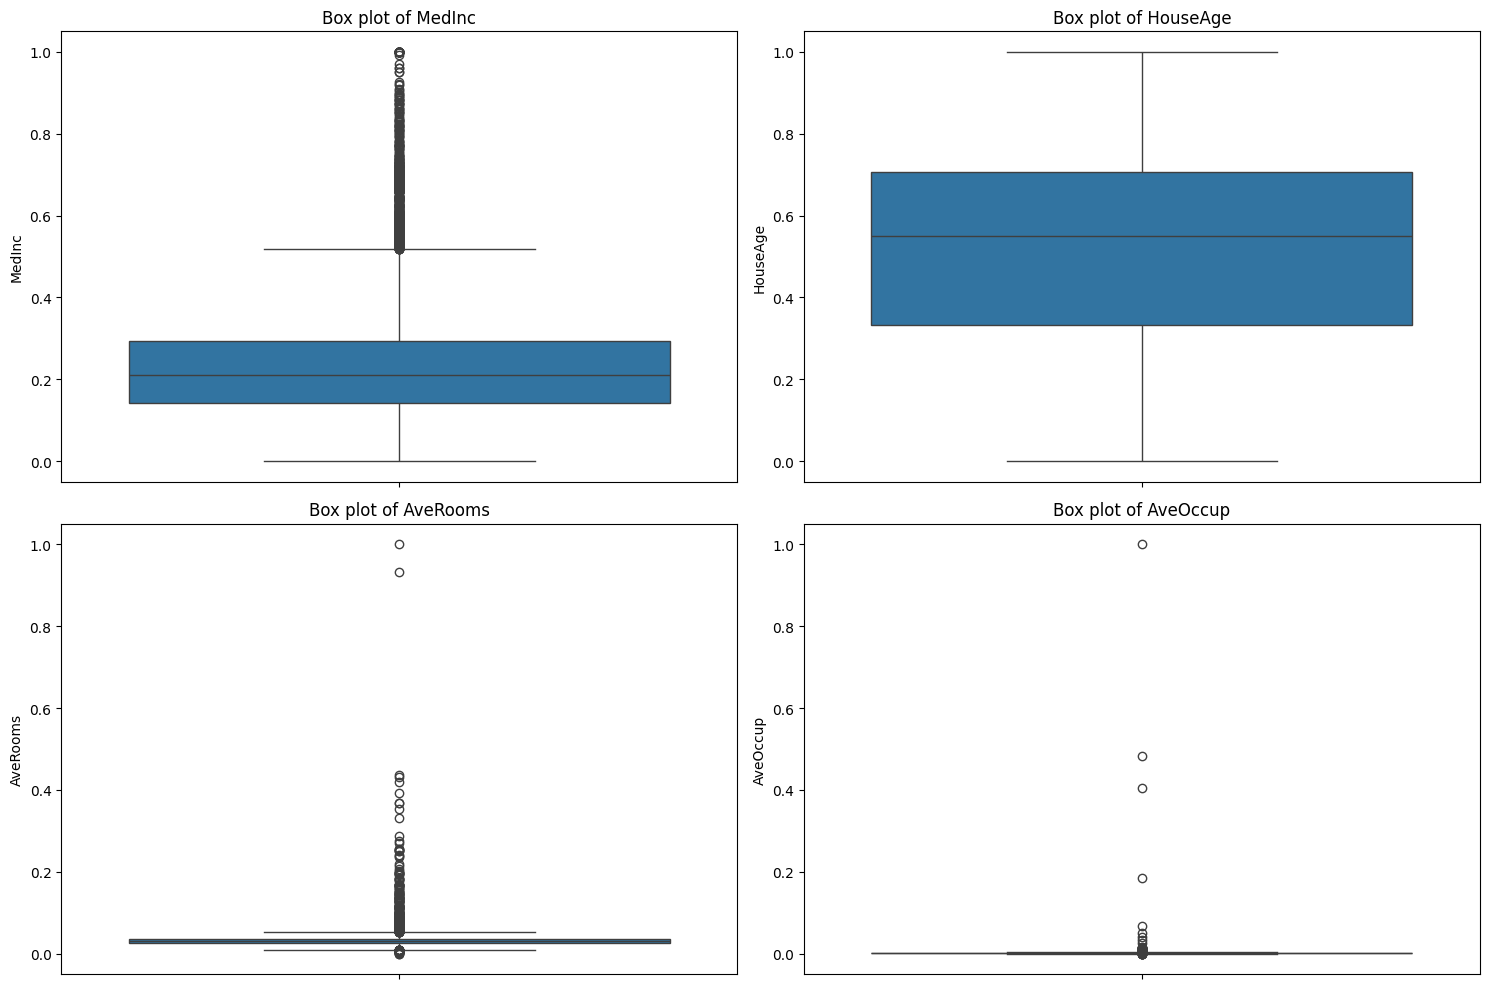

In [18]:
print("\nBox plots to detect outliers:")
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.boxplot(y=df['MedInc'])
plt.title('Box plot of MedInc')

plt.subplot(2, 2, 2)
sns.boxplot(y=df['HouseAge'])
plt.title('Box plot of HouseAge')

plt.subplot(2, 2, 3)
sns.boxplot(y=df['AveRooms'])
plt.title('Box plot of AveRooms')

plt.subplot(2, 2, 4)
sns.boxplot(y=df['AveOccup'])
plt.title('Box plot of AveOccup')

plt.tight_layout()
plt.show()

In [19]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0.539668,0.784314,0.043512,0.020469,0.008941,0.001499,0.567481,0.211155,4.526
1,0.538027,0.392157,0.038224,0.018929,0.067210,0.001141,0.565356,0.212151,3.585
2,0.466028,1.000000,0.052756,0.021940,0.013818,0.001698,0.564293,0.210159,3.521
3,0.354699,1.000000,0.035241,0.021929,0.015555,0.001493,0.564293,0.209163,3.413
4,0.230776,1.000000,0.038534,0.022166,0.015752,0.001198,0.564293,0.209163,3.422
...,...,...,...,...,...,...,...,...,...
20635,0.073130,0.470588,0.029769,0.023715,0.023599,0.001503,0.737513,0.324701,0.781
20636,0.141853,0.333333,0.037344,0.029124,0.009894,0.001956,0.738576,0.312749,0.771
20637,0.082764,0.313725,0.030904,0.023323,0.028140,0.001314,0.732200,0.311753,0.923
20638,0.094295,0.333333,0.031783,0.024859,0.020684,0.001152,0.732200,0.301793,0.847
